# DAT 203 Assignment 10

- Author: Colin Bowers
- Date: July 22, 2003


### Define mean shift clustering?

Mean Shift is an unsupervised machine learning clustering technique used to identify clusters in a dataset without needing to specify the number of clusters in advance. It works by iteratively shifting data points towards higher density regions, which correspond to cluster centroids. 

Mean Shift is useful when dealing with irregularly shaped clusters and varying densities. One of the main advantages of Mean Shift is that it requires minimal parameter tuning since it relies on a single parameter, the bandwidth, which controls the size of the search window for the nearest neighbours.

The algorithm proceeds as follows:
1. Initially, consider each data point as a potential centroid. 
1. For each data point:
    1. Find the nearest neighbours within a specified bandwidth or radius (given as a parameter).
    1. Move the point towards the mean of the neighbours (i.e. the new centroid)
    1. Repeat until the list of new centroids do not change (within a small tolerance)
1. Remove the duplicates from the final list of centroids
1. Assign a cluster ID to all of the original data points based on which centroid its closest to

### Implement mean shift from the ground up.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 
import seaborn as sns

from scipy.spatial import distance


In [2]:
def find_clusters(data, radius=4, verbose=0):
    """
    Mean Shift Clustering 

    Parameters:
        data: array of ints 
            Dataset being analysed 
            
        radius: float (optional)
            Bandwidth parameter to control the size of the search window
            
        verbose: int (optional)
            Level of output during processing.  0 for none.

    Returns:
        centroids: array of points
            List of points of each unique cluster center
            
        labels: array of ints
            Cluster assignment for each point in the given data
    """
    
    # start with making all of the given data points centroids
    centroids = data.copy()
    
    # loop until convergence (max 10 iterations)
    for iteration in range(0, 10):
        
        new_centroids = np.zeros_like(centroids)
        
        # for each data point, find its neighbors within the radius
        for i, point in enumerate(centroids):
            
            distances = distance.cdist([point], centroids)
            neighbors = centroids[distances[0] < radius]
            
            # determine the distance between the point and the mean of its neighbors
            shift_vector = np.mean(neighbors, axis=0) - point
            
            # update the new centroid by shifting towards the mean of the neighbors
            new_centroids[i] = point + shift_vector
            
        # check if the centroids moved, within a small tolerance, since previous iteration
        if np.allclose(centroids, new_centroids):
            break
            
        centroids = new_centroids
        
    # remove duplicates to get the final list of centroids
    centroids = np.unique(centroids, axis=0)
    
    # assign each data point to the nearest centroid as the cluster label
    labels = np.argmin(distance.cdist(data, centroids), axis=1)
    
    if verbose >= 1:
        print (f"Found {len(centroids)} clusters after {iteration} iterations.")
    
    return centroids, labels


### Use the make_blob function from previous assignment for testing.

In [3]:
from sklearn.datasets import make_blobs
import random

In [4]:
def make_random_blobs(num_centers, center_sd, n_samples=100):
    X, y = make_blobs(
        n_samples = n_samples, 
        centers = num_centers,
        random_state = 0, 
        cluster_std = center_sd
    )
    return X

In [5]:
def plot_results(X, y, centers, bw):
    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1])
    plt.title(f"Original (n={n}, sd={sd})")

    plt.subplot(1, 2, 2)
    plt.scatter(x=X[:,0], y=X[:,1], c=y)
    plt.scatter(centers[:,0], centers[:,1], c="red", marker="+", s=200, lw=3)
    plt.title(f"Found {len(centers)} Clusters (bw={bw})")
    
    plt.show()

In [6]:
n = 5
sd = 0.5

pts = make_random_blobs(n, sd)
pts.shape

(100, 2)

Found 4 clusters after 3 iterations.


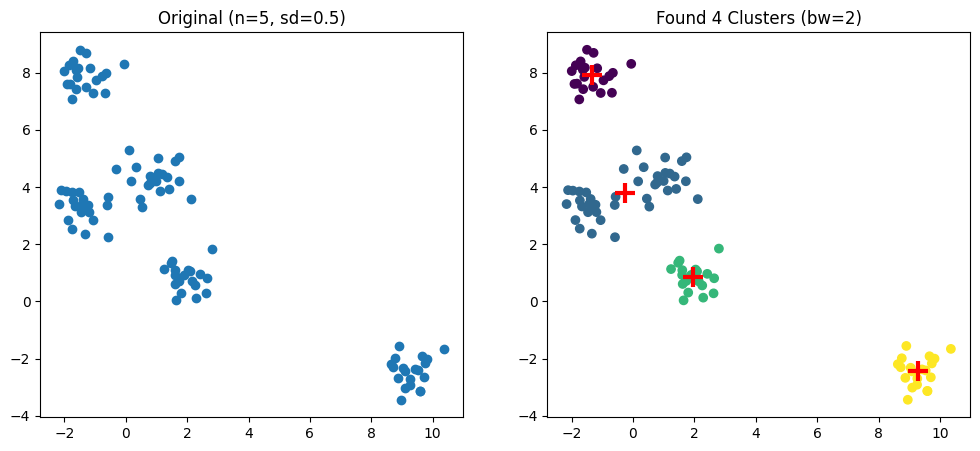

In [7]:
r = 2
centers, y = find_clusters(pts, r, verbose=1)
plot_results(pts, y, centers, r)

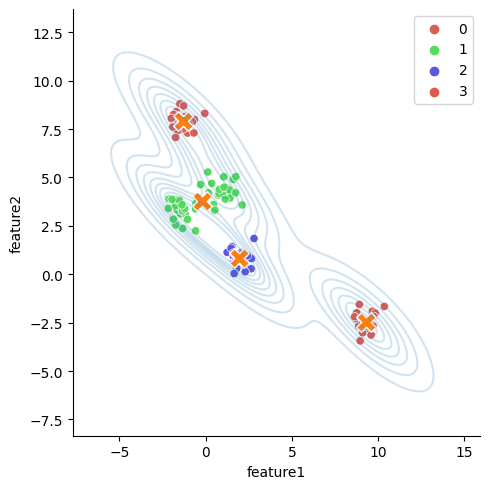

In [8]:
df = pd.DataFrame(pts, columns=["feature1", "feature2"])
df_centers = pd.DataFrame(centers, columns=["X", "Y"])

sns.displot(data=df, x="feature1", y="feature2", kind="kde", alpha=0.2)
sns.scatterplot(data=df, x="feature1", y="feature2", hue=y, palette="hls")
sns.scatterplot(data=df_centers, x="X", y="Y", s=200, marker="X")
plt.show()

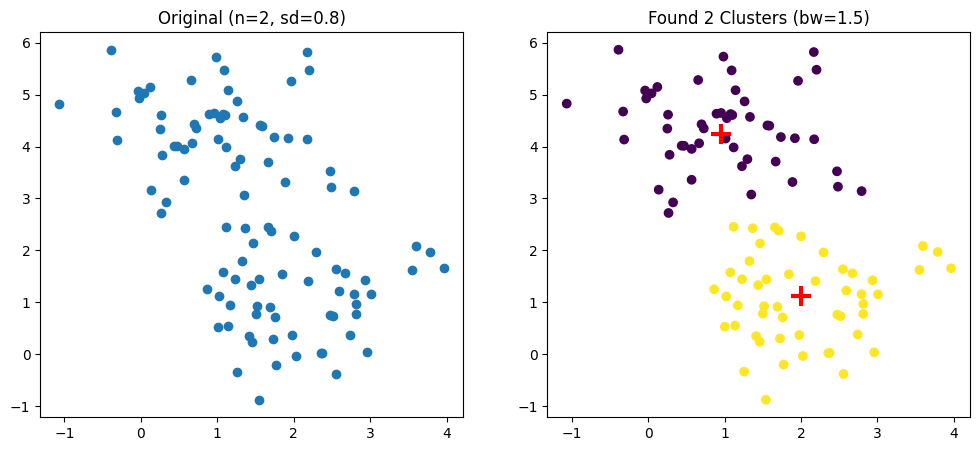

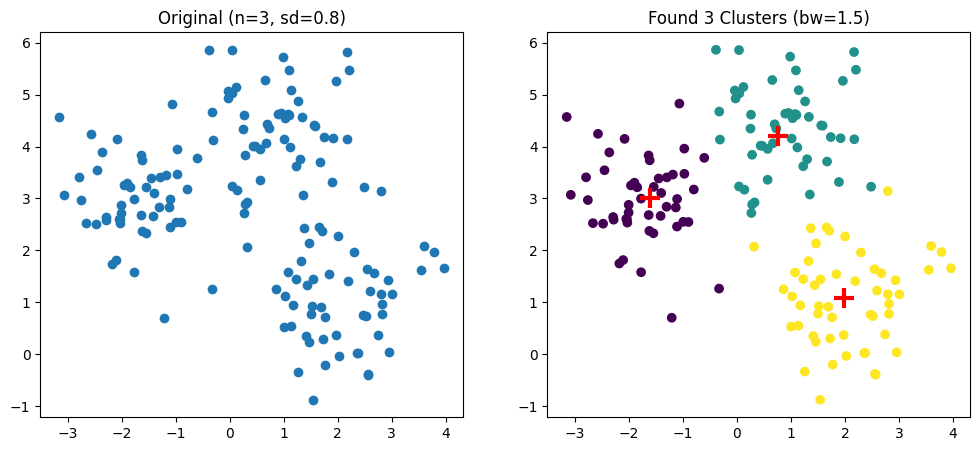

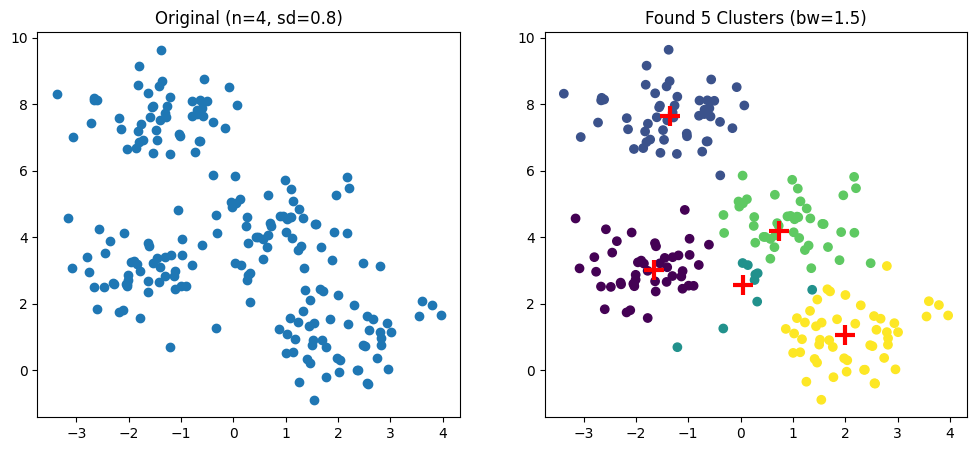

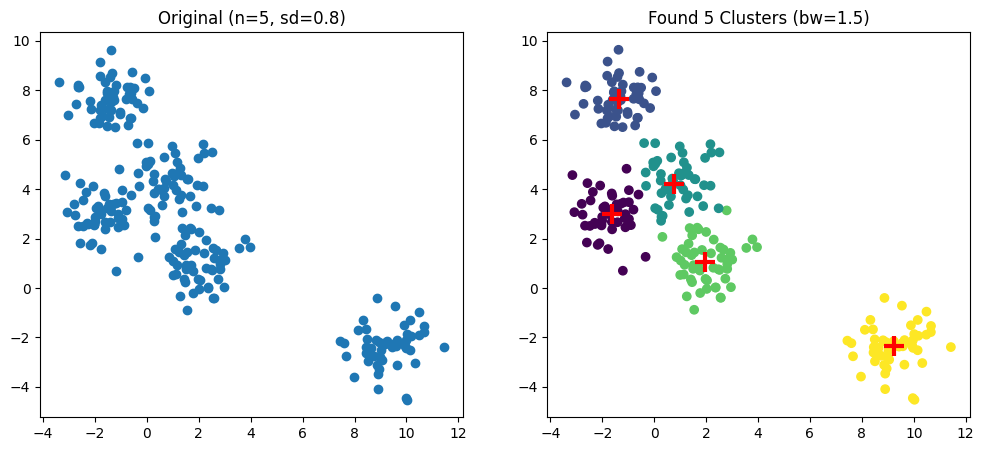

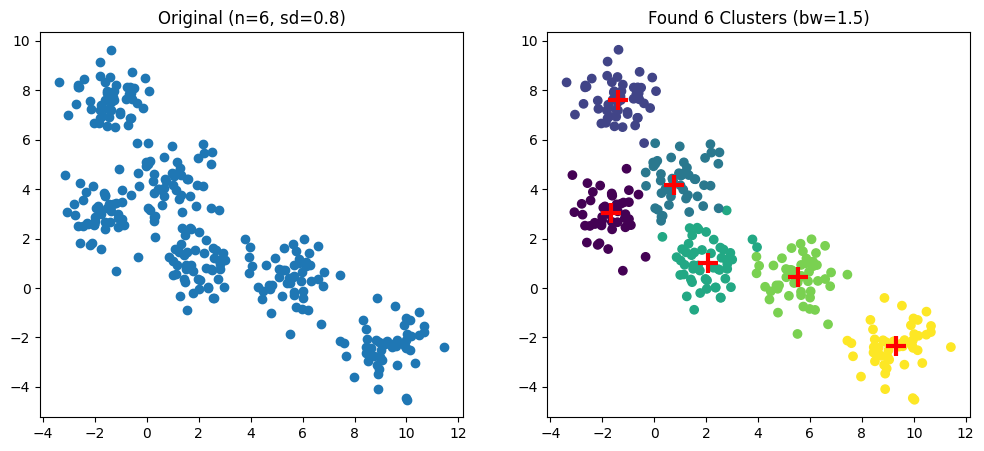

In [11]:
r = 1.5
sd = 0.8
for n in range(2,7):
    pts = make_random_blobs(n, sd, 50*n)
    centers, y = find_clusters(pts, r)
    
    plt.figure(figsize=(12,5))

    plt.subplot(1, 2, 1)
    plt.scatter(pts[:, 0], pts[:, 1])
    plt.title(f"Original (n={n}, sd={sd})")

    plt.subplot(1, 2, 2)
    plt.scatter(x=pts[:,0], y=pts[:,1], c=y)
    plt.scatter(centers[:,0], centers[:,1], c="red", marker="+", s=200, lw=3)
    plt.title(f"Found {len(centers)} Clusters (bw={r})")
    
    plt.show()